In [4]:
import pandas as pd
import os   
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import gzip
import shutil

sns.set(style="whitegrid")

In [5]:
import os
NOTEBOOK_DIR = os.getcwd()
BASE_DIR = os.path.abspath(os.path.join(NOTEBOOK_DIR, ".."))
DATA_DIR   = os.path.join(BASE_DIR, "data")
LOCAL_GZ   = os.path.join(DATA_DIR, "kddcup.data_10_percent.gz")
LOCAL_CSV  = os.path.join(DATA_DIR, "kddcup.data_10_percent.csv")
DATA_URL   = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"

In [6]:
def download_and_extract():
    os.makedirs(DATA_DIR, exist_ok=True)

    if not os.path.exists(LOCAL_GZ):
        print("Downloading 10% KDD Cup '99 data…")
        urllib.request.urlretrieve(DATA_URL, LOCAL_GZ)
        print("Download complete.")
    else:
        print(f"{LOCAL_GZ} already exists, skipping download.")

    if not os.path.exists(LOCAL_CSV):
        print("Extracting .gz to .csv…")
        with gzip.open(LOCAL_GZ, 'rb') as f_in, open(LOCAL_CSV, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
        print("Extraction complete.")
    else:
        print(f"{LOCAL_CSV} already exists, skipping extraction.")
    return(LOCAL_CSV)

In [7]:
csv_path = download_and_extract()

c:\Users\Admin\data\kddcup.data_10_percent.gz already exists, skipping download.
c:\Users\Admin\data\kddcup.data_10_percent.csv already exists, skipping extraction.


In [8]:
names_url = "https://kdd.ics.uci.edu/databases/kddcup99/kddcup.names"
response = requests.get(names_url)
lines = response.text.splitlines()
col_names = [
    line.split(":")[0].strip()
    for line in lines[1:]
    if ":" in line
]
col_names.append("label")

In [10]:
csv_path = '../data/kddcup.data_10_percent.csv'
df_kddcup_10_raw = pd.read_csv(csv_path, names=col_names)

In [11]:
df_kddcup_10_raw

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [12]:
lines[0]

'back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.'

# 3. Analye the Labels

A list of Attack Types can be found here:
[Attack Types](https://kdd.ics.uci.edu/databases/kddcup99/training_attack_types)

The Atack types are explained here in further detail:
<details>
<summary><strong>1. DoS (Denial of Service)</strong> <br>
Attacks that overwhelm system resources to make services unavailable
</summary>

- **`smurf.`** – ICMP flood using spoofed broadcast ping.  
- **`neptune.`** – SYN flood attack.  
- **`back.`** – Backdoor access via malicious HTTP requests.  
- **`teardrop.`** – Exploits IP fragmentation bugs.  
- **`pod.`** – Ping of Death: oversized ping packets.  
- **`land.`** – Sends spoofed packets with the same source and destination IP/port.  

</details>

<details>
<summary><strong>2. Probe (Scanning/Surveillance)</strong> <br>
Used for gathering information about networks:
</summary>

- **`satan.`** – Scans for known vulnerabilities.  
- **`ipsweep.`** – Detects live hosts via ping sweep.  
- **`portsweep.`** – Scans for open ports on targets.  
- **`nmap.`** – Uses port scanning tools like Nmap.  

</details>

<details>
<summary><strong>3. R2L (Remote to Local)</strong> <br>
Attempts to gain local access from a remote machine:
</summary>

- **`guess_passwd.`** – Brute-force password attack.  
- **`ftp_write.`** – Exploits writable FTP directories.  
- **`imap.`** – IMAP buffer overflow.  
- **`phf.`** – Exploits CGI script vulnerability.  
- **`multihop.`** – Uses a compromised host to pivot to others.  
- **`warezclient.`** – Unauthorized FTP download.  
- **`warezmaster.`** – Uploads pirated software via FTP.  
- **`spy.`** – Packet sniffing for sensitive information.  

</details>

<details>
<summary><strong>4. U2R (User to Root)</strong> <br>
Tries to gain root privileges from a normal user account:
</summary>


- **`buffer_overflow.`** – Classic buffer overflow exploit.  
- **`loadmodule.`** – Exploits dynamic kernel module loading.  
- **`rootkit.`** – Installs rootkits for stealthy access.  
- **`perl.`** – Exploits via malicious Perl scripts.  

</details>


In [14]:
url = "https://kdd.ics.uci.edu/databases/kddcup99/training_attack_types"
response = requests.get(url)
lines = response.text.strip().splitlines()

In [15]:
attack_class_mapping = {}
for line in lines:
    if line.strip():
        attack, category = line.strip().split()
        attack_class_mapping[attack] = category
attack_class_mapping["normal"] = "normal"
df_kddcup_10_raw['attack_class'] = df_kddcup_10_raw['label'].str.rstrip('.').map(attack_class_mapping)

## 🧠 Evaluation of KDD99 Attack Labels

### 📊 Overall Attack Class Distribution

The dataset is **highly imbalanced**, with a strong dominance of **DoS attacks**. This has important implications for model training, requiring strategies such as resampling or class weighting.

| Attack Class | Samples  | Percentage |
|--------------|----------|------------|
| `dos`        | 391,458  | **79.2%**  |
| `normal`     |  97,278  | 19.7%      |
| `probe`      |   4,107  | 0.8%       |
| `r2l`        |   1,126  | 0.2%       |
| `u2r`        |      52  | ~0.0%      |

---

### 🔍 Observations per Class

#### `normal`
- Represents about 1/5 of the data.
- Useful baseline for binary classification tasks.

#### `dos` (Denial of Service)
- Overwhelming majority of samples (nearly 80%).
- Most common labels: `smurf.`, `neptune.`
- Models trained on this dataset may bias toward recognizing DoS patterns.

#### `probe`
- Accounts for less than 1% of the data.
- Labels like `satan.`, `ipsweep.`, and `portsweep.` are most frequent.
- Might require oversampling or synthetic data generation to avoid underfitting.

#### `r2l` (Remote to Local)
- Very rare class (~0.2%).
- Dominated by `warezclient.` with smaller fractions of `guess_passwd.`, `imap.`, etc.
- Hard to learn for most classifiers without augmentation.

#### `u2r` (User to Root)
- Only **52 samples** in total.
- This is a **critically rare** class and nearly invisible to unbalanced models.
- Needs extreme balancing (e.g. SMOTE, GANs, anomaly-based detection).

---

### ⚠️ Conclusion

- The **imbalance** makes this dataset an ideal candidate for **imbalanced learning techniques**.
- Especially for `u2r` and `r2l`, performance evaluation using metrics like **F1-score** and **recall per class** is crucial.
- Without mitigation, models will likely default to classifying most inputs as `dos` or `normal`.


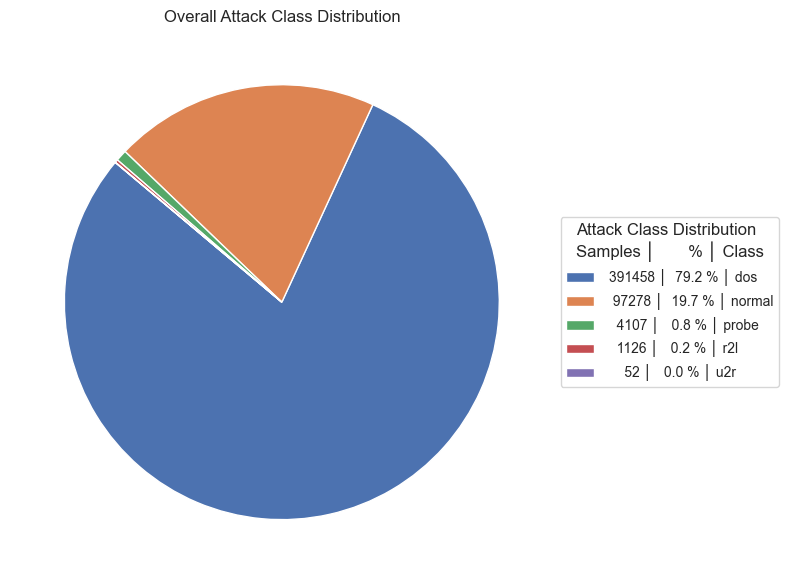

In [16]:
import matplotlib.pyplot as plt

# Count total samples per attack class (including 'normal')
class_counts = df_kddcup_10_raw['attack_class'].fillna('unknown').value_counts()
labels = class_counts.index
sizes = class_counts.values
percentages = (sizes / sizes.sum() * 100).round(2)

# Create the figure
plt.figure(figsize=(8, 6))

# Draw pie without internal labels or autopct
wedges, _ = plt.pie(
    sizes,
    labels=None,
    startangle=140,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# Create well-aligned legend labels
max_label_len = max(len(label) for label in labels)
legend_labels = [
    f"{str(count).rjust(7)} │ {f'{perc:.1f} %'.rjust(7)} │ {label.ljust(max_label_len)}"
    for label, count, perc in zip(labels, sizes, percentages)
]

# Legend title
legend_title = (
    "Attack Class Distribution\n"
    f"{'Samples'.rjust(7)} │ {'%'.rjust(7)} │ {'Class'}"
)

# Add the legend
plt.legend(
    wedges,
    legend_labels,
    title=legend_title,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize='small',
    title_fontsize='medium'
)

# Add plot title
plt.title("Overall Attack Class Distribution")
plt.tight_layout()
plt.show()


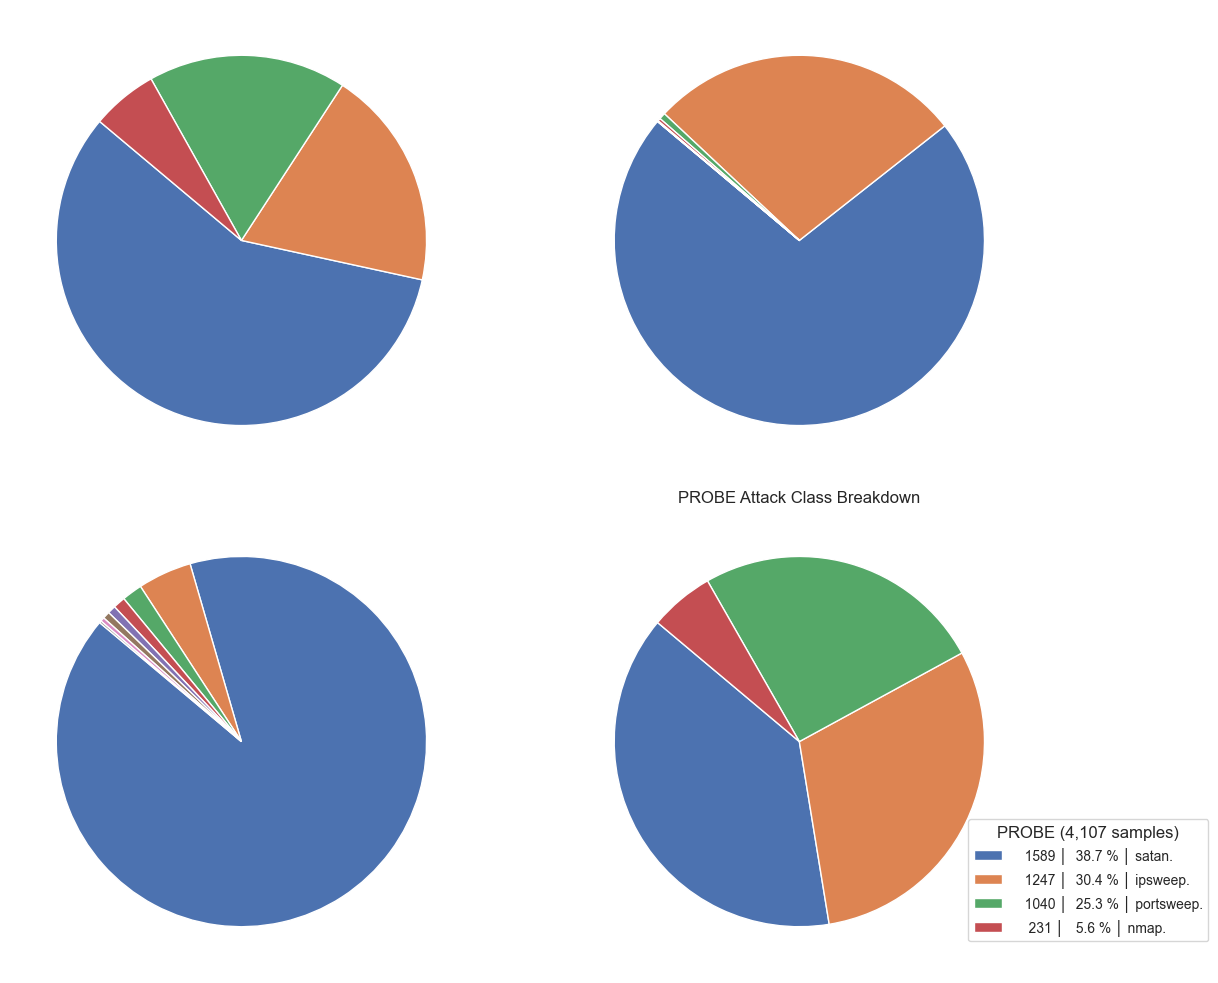

In [16]:
import matplotlib.pyplot as plt
import pandas as pd


if "attack_class" not in df_kddcup_10_raw.columns:
    df_kddcup_10_raw["attack_class"] = df_kddcup_10_raw["label"].str.rstrip(".").map(attack_class_mapping)

# Filter out normal traffic
df_attacks_only = df_kddcup_10_raw[df_kddcup_10_raw["attack_class"] != "normal"]

# Get unique attack classes
attack_classes = df_attacks_only['attack_class'].unique()

# Create 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Plot pie charts with improved legends
for i, attack_class in enumerate(attack_classes):
    subset = df_attacks_only[df_attacks_only['attack_class'] == attack_class]
    label_counts = subset['label'].value_counts()
    label_percents = (label_counts / label_counts.sum() * 100).round(2)
    
    labels = label_counts.index
    sizes = label_counts.values
    total_count = sum(sizes)

    # Create pie chart without internal labels
    wedges, _ = axes[i].pie(
        sizes,
        startangle=140,
        labels=None,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
    )

 # Max label width for padding
max_label_len = max(len(label) for label in labels)

# Format all columns to be column-aligned using str.rjust and str.ljust
legend_labels = [
    f"{str(count).rjust(7)} │ {f'{perc:.1f} %'.rjust(7)} │ {label.ljust(max_label_len)}"
    for label, count, perc in zip(labels, sizes, label_percents)
]


axes[i].legend(
    wedges,
    legend_labels,
    title=f"{attack_class.upper()} ({total_count:,} samples)",
    loc="center left",
    bbox_to_anchor=(0.85, 0.2),  # Shift legend further left
    fontsize='small',
    title_fontsize='medium'
)
axes[i].set_title(f"{attack_class.upper()} Attack Class Breakdown")

plt.tight_layout()
plt.show()


# 4. Analyze the Features

In [18]:
# Define the full list of KDD features excluding the label
all_features = df_kddcup_10_raw.columns.tolist()
all_features.remove("label")
all_features.remove("attack_class")  # if already added

# Based on kddcup.names classification
categorical_features = [
    "protocol_type", "service", "flag", "land", "logged_in", "is_host_login", "is_guest_login"
]
numerical_features = [f for f in all_features if f not in categorical_features]

print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)


Categorical features: ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login']
Numerical features: ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


## Numerical Features

In [19]:
df_kddcup_10_raw[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
duration,494021.0,47.979302,707.746472,0.0,0.00,0.0,0.00,58329.0
src_bytes,494021.0,3025.610296,988218.101050,0.0,45.00,520.0,1032.00,693375640.0
dst_bytes,494021.0,868.532425,33040.001252,0.0,0.00,0.0,0.00,5155468.0
wrong_fragment,494021.0,0.006433,0.134805,0.0,0.00,0.0,0.00,3.0
urgent,494021.0,0.000014,0.005510,0.0,0.00,0.0,0.00,3.0
hot,494021.0,0.034519,0.782103,0.0,0.00,0.0,0.00,30.0
num_failed_logins,494021.0,0.000152,0.015520,0.0,0.00,0.0,0.00,5.0
num_compromised,494021.0,0.010212,1.798326,0.0,0.00,0.0,0.00,884.0
root_shell,494021.0,0.000111,0.010551,0.0,0.00,0.0,0.00,1.0
su_attempted,494021.0,0.000036,0.007793,0.0,0.00,0.0,0.00,2.0


## Categorical Features


🧾 protocol_type – Top categories:
protocol_type
icmp    283602
tcp     190065
udp      20354
Name: count, dtype: int64



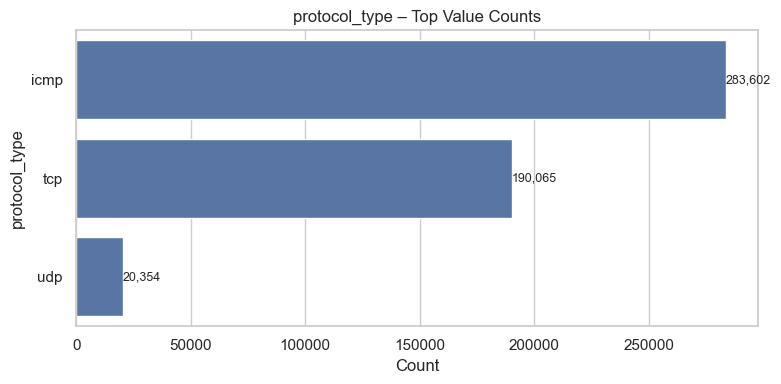


🧾 service – Top categories:
service
ecr_i         281400
private       110893
http           64293
smtp            9723
other           7237
domain_u        5863
ftp_data        4721
eco_i           1642
ftp              798
finger           670
urp_i            538
telnet           513
ntp_u            380
auth             328
pop_3            202
time             157
csnet_ns         126
remote_job       120
gopher           117
imap4            117
Name: count, dtype: int64



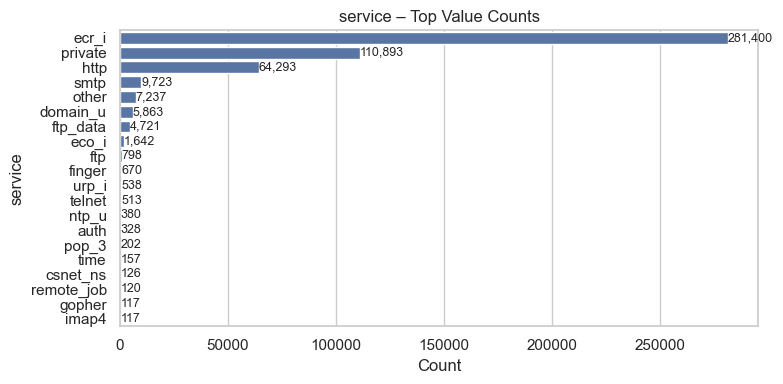


🧾 flag – Top categories:
flag
SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: count, dtype: int64



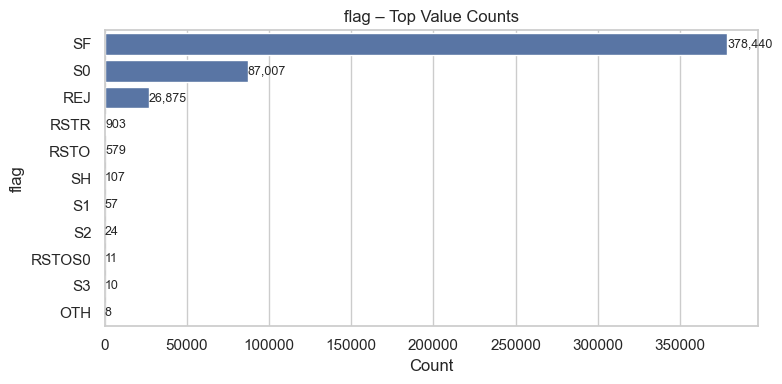


🧾 land – Top categories:
land
0    493999
1        22
Name: count, dtype: int64



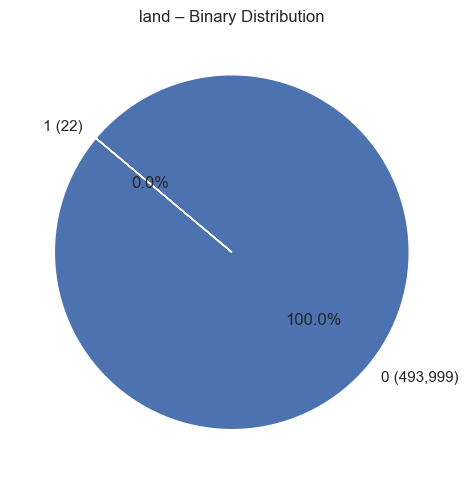


🧾 logged_in – Top categories:
logged_in
0    420784
1     73237
Name: count, dtype: int64



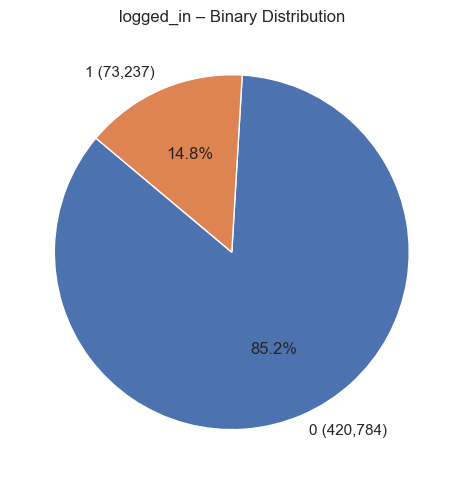

⚠️ Skipping 'is_host_login' – only one unique value.

🧾 is_guest_login – Top categories:
is_guest_login
0    493336
1       685
Name: count, dtype: int64



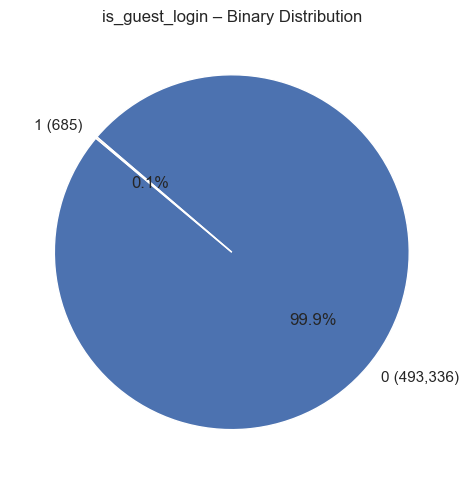

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in categorical_features:
    counts = df_kddcup_10_raw[col].value_counts()
    
    # Skip features with only one unique value
    if counts.nunique() <= 1:
        print(f"⚠️ Skipping '{col}' – only one unique value.")
        continue

    print(f"\n🧾 {col} – Top categories:\n{counts.head(20)}\n")

    # Pie chart for binary features
    if len(counts) == 2:
        plt.figure(figsize=(5, 5))
        plt.pie(
            counts.values,
            labels=[f"{idx} ({val:,})" for idx, val in zip(counts.index, counts.values)],
            startangle=140,
            wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
            autopct='%1.1f%%'
        )
        plt.title(f"{col} – Binary Distribution")
        plt.tight_layout()
        plt.show()

    # Bar plot for multi-class features
    else:
        plt.figure(figsize=(8, 4))
        sns.barplot(x=counts.values[:20], y=counts.index[:20])
        plt.title(f"{col} – Top Value Counts")
        plt.xlabel("Count")
        plt.ylabel(col)

        # Add count labels to bars
        for i, val in enumerate(counts.values[:20]):
            plt.text(val, i, f"{val:,}", va='center', ha='left', fontsize=9)

        plt.tight_layout()
        plt.show()
